In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sb

warnings.filterwarnings("ignore")

In [2]:
train_df_0 = pd.read_csv('./train.csv')
valid_df_0 = pd.read_csv('./valid.csv')
X_test_0 = pd.read_csv('./X_test.csv')

In [3]:
train_df_0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
print(train_df_0.shape)
print(valid_df_0.shape)
print(X_test_0.shape)

(517788, 145)
(172596, 145)
(172596, 144)


In [5]:
print(train_df_0.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'loan_status'],
      dtype='object', length=145)


In [6]:
train_df_0.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,loan_status
count,0.0,0.0,517788.000000,517788.000000,517788.000000,517788.000000,517788.000000,5.177880e+05,0.0,517656.000000,...,2797.000000,2797.0,2797.000000,1679.000000,2797.000000,2797.000000,19260.000000,19260.000000,19260.000000,517788.000000
mean,NaN,NaN,14580.588050,14572.051786,14549.171157,13.580725,442.133178,7.534984e+04,NaN,18.516001,...,153.923093,3.0,14.363961,430.108803,11300.679496,185.918298,5081.065063,47.712138,13.103271,0.696801
std,NaN,NaN,8719.958244,8715.990085,8718.254109,4.856040,261.527582,6.797839e+04,NaN,11.408157,...,130.809238,0.0,9.634885,361.895340,7484.414320,192.668793,3702.917436,7.662900,8.306807,0.459641
min,NaN,NaN,500.000000,500.000000,0.000000,5.310000,4.930000,0.000000e+00,NaN,-1.000000,...,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000,0.000000
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,9.990000,252.510000,4.500000e+04,NaN,12.010000,...,55.480000,3.0,7.000000,159.345000,5370.060000,40.050000,2257.750000,45.000000,6.000000,0.000000
50%,NaN,NaN,12175.000000,12150.000000,12075.000000,12.990000,379.155000,6.500000e+04,NaN,17.880000,...,116.380000,3.0,16.000000,327.300000,9737.170000,124.690000,4219.630000,45.000000,14.000000,1.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,16.490000,584.960000,9.000000e+04,NaN,24.360000,...,216.520000,3.0,23.000000,593.925000,15761.170000,273.130000,6970.070000,50.000000,18.000000,1.000000
max,NaN,NaN,40000.000000,40000.000000,40000.000000,30.990000,1715.420000,9.500000e+06,NaN,999.000000,...,943.940000,3.0,32.000000,2178.810000,39542.450000,1407.860000,33601.000000,521.350000,181.000000,1.000000


In [7]:
train_df_0.isna().sum()

id                       517788
member_id                517788
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_date          498528
settlement_amount        498528
settlement_percentage    498528
settlement_term          498528
loan_status                   0
Length: 145, dtype: int64

# Data preprocessing

**Remove columns with more than 250,000 null entries**

In [8]:
null_val_series = train_df_0.isna().sum()
null_250000_below = null_val_series[null_val_series<250000]
len(null_250000_below)

87

In [9]:
selected_columns = null_250000_below.index
selected_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_s

In [10]:
train_df_1 = train_df_0[selected_columns]
valid_df_1 = valid_df_0[selected_columns]
X_test_1 = X_test_0[selected_columns[:-1]]

In [11]:
print(len(train_df_1.dtypes[train_df_1.dtypes=='object']))

21


**Removing columns with exactly one value**

In [12]:
columns_with_one_unique_value = []

for column in train_df_1.columns:
    num_unique_values = train_df_1[column].nunique()
    if num_unique_values == 1:
        columns_with_one_unique_value.append(column)
        
columns_with_one_unique_value

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']

In [13]:
train_df_2 = train_df_1.drop(columns_with_one_unique_value, axis=1)
valid_df_2 = valid_df_1.drop(columns_with_one_unique_value, axis=1)
X_test_2 = X_test_1.drop(columns_with_one_unique_value, axis=1)

**Outlier detection and handling**

In [14]:
numerical_columns = train_df_2.dtypes[train_df_2.dtypes!='object'].index
numerical_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       

In [15]:
def count_outliers(data, threshold=1.5):

    # Calculate quartiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Count outliers
    outliers_count = np.sum((data < lower_bound) | (data > upper_bound))
    
    return outliers_count

In [16]:
for col in numerical_columns:
    outliers_count = count_outliers(train_df_2[col])
    print(f"{col}: {outliers_count}")

loan_amnt: 2601
funded_amnt: 2601
funded_amnt_inv: 2601
int_rate: 7430
installment: 16049
annual_inc: 24087
dti: 0
delinq_2yrs: 100579
inq_last_6mths: 28980
open_acc: 17900
pub_rec: 89557
revol_bal: 30209
revol_util: 0
total_acc: 8649
total_pymnt: 16322
total_pymnt_inv: 16409
total_rec_prncp: 16132
total_rec_int: 36624
total_rec_late_fee: 28155
recoveries: 106288
collection_recovery_fee: 101363
last_pymnt_amnt: 36044
collections_12_mths_ex_med: 0
acc_now_delinq: 2435
tot_coll_amt: 0
tot_cur_bal: 0
total_rev_hi_lim: 0
acc_open_past_24mths: 0
avg_cur_bal: 0
bc_open_to_buy: 0
bc_util: 0
chargeoff_within_12_mths: 0
delinq_amnt: 1926
mo_sin_old_il_acct: 0
mo_sin_old_rev_tl_op: 0
mo_sin_rcnt_rev_tl_op: 0
mo_sin_rcnt_tl: 0
mort_acc: 0
mths_since_recent_bc: 0
mths_since_recent_inq: 0
num_accts_ever_120_pd: 0
num_actv_bc_tl: 0
num_actv_rev_tl: 0
num_bc_sats: 0
num_bc_tl: 0
num_il_tl: 0
num_op_rev_tl: 0
num_rev_accts: 0
num_rev_tl_bal_gt_0: 0
num_sats: 0
num_tl_120dpd_2m: 0
num_tl_30dpd: 0
num_t

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def handle_outliers(data, threshold=1.5):

    # Calculate the quartiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Interquartile range
    iqr = q3 - q1

    # Define the upper and lower bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Replace outliers with the median
    data_without_outliers = np.where((data < lower_bound) | (data > upper_bound), np.median(data), data)

    return data_without_outliers

In [19]:
train_df_3 = train_df_2.copy(deep=True)
valid_df_3 = valid_df_2.copy(deep=True)
X_test_3 = X_test_2.copy(deep=True)

for col in numerical_columns:
    train_df_3[col] = handle_outliers(train_df_3[col])

In [20]:
for col in numerical_columns:
    outliers_count = count_outliers(train_df_3[col])
    print(f"{col}: {outliers_count}")

loan_amnt: 0
funded_amnt: 0
funded_amnt_inv: 0
int_rate: 3330
installment: 6424
annual_inc: 9848
dti: 0
delinq_2yrs: 0
inq_last_6mths: 0
open_acc: 0
pub_rec: 0
revol_bal: 16588
revol_util: 0
total_acc: 3653
total_pymnt: 9962
total_pymnt_inv: 9944
total_rec_prncp: 3700
total_rec_int: 22899
total_rec_late_fee: 0
recoveries: 0
collection_recovery_fee: 0
last_pymnt_amnt: 36868
collections_12_mths_ex_med: 0
acc_now_delinq: 0
tot_coll_amt: 0
tot_cur_bal: 0
total_rev_hi_lim: 0
acc_open_past_24mths: 0
avg_cur_bal: 0
bc_open_to_buy: 0
bc_util: 0
chargeoff_within_12_mths: 0
delinq_amnt: 0
mo_sin_old_il_acct: 0
mo_sin_old_rev_tl_op: 0
mo_sin_rcnt_rev_tl_op: 0
mo_sin_rcnt_tl: 0
mort_acc: 0
mths_since_recent_bc: 0
mths_since_recent_inq: 0
num_accts_ever_120_pd: 0
num_actv_bc_tl: 0
num_actv_rev_tl: 0
num_bc_sats: 0
num_bc_tl: 0
num_il_tl: 0
num_op_rev_tl: 0
num_rev_accts: 0
num_rev_tl_bal_gt_0: 0
num_sats: 0
num_tl_120dpd_2m: 0
num_tl_30dpd: 0
num_tl_90g_dpd_24m: 0
num_tl_op_past_12m: 0
pct_tl_nvr_d

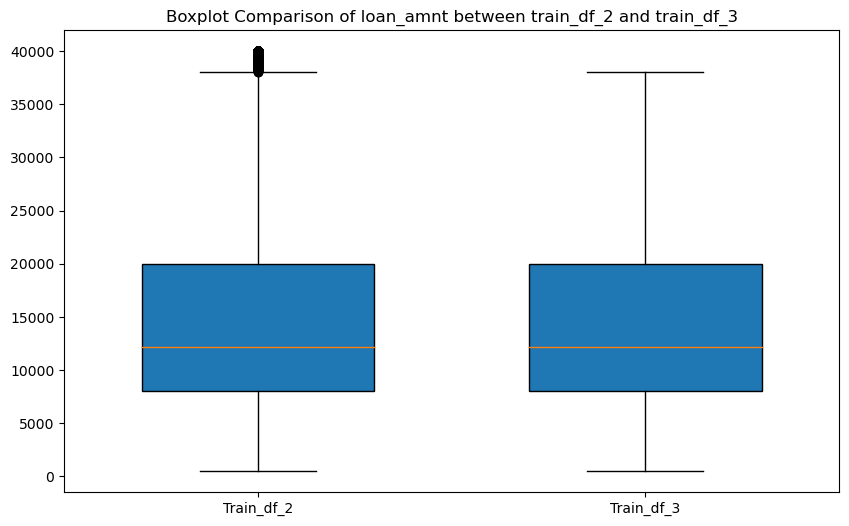

In [22]:
plt.figure(figsize=(10, 6))

# Plotting the boxplot for train_df_2
plt.boxplot(train_df_2['loan_amnt'], positions=[1], widths=0.6, patch_artist=True)

# Plotting the boxplot for train_df_3
plt.boxplot(train_df_3['loan_amnt'], positions=[2], widths=0.6, patch_artist=True)

# Adding labels and title
plt.xticks([1, 2], ['Train_df_2', 'Train_df_3'])
plt.title('Boxplot Comparison of loan_amnt between train_df_2 and train_df_3')

plt.show()

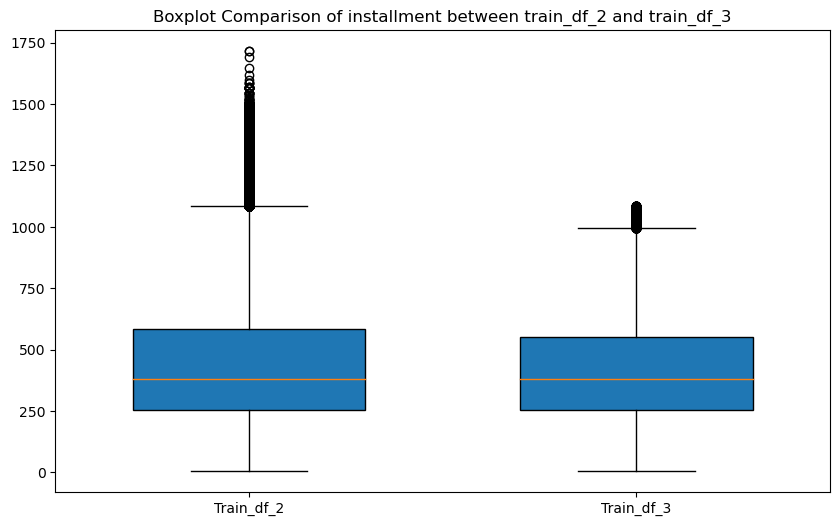

In [23]:
plt.figure(figsize=(10, 6))

# Plotting the boxplot for train_df_2
plt.boxplot(train_df_2['installment'], positions=[1], widths=0.6, patch_artist=True)

# Plotting the boxplot for train_df_3
plt.boxplot(train_df_3['installment'], positions=[2], widths=0.6, patch_artist=True)

# Adding labels and title
plt.xticks([1, 2], ['Train_df_2', 'Train_df_3'])
plt.title('Boxplot Comparison of installment between train_df_2 and train_df_3')

plt.show()

**cleaning missing values**

In [24]:
train_df_3[numerical_columns].isna().sum()      #missing value columns in numerical columns

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
                              ...  
tot_hi_cred_lim               25879
total_bal_ex_mort             17975
total_bc_limit                17975
total_il_high_credit_limit    25879
loan_status                       0
Length: 63, dtype: int64

In [25]:
categorical_columns = train_df_3.dtypes[train_df_3.dtypes=='object'].index

In [26]:
categorical_columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [27]:
len(train_df_3.isna().sum()[train_df_3.isna().sum()>1])

45

In [28]:
train_df_3[numerical_columns]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,14000.0,14000.0,14000.0,7.35,434.53,44000.00,34.70,0.0,0.0,7.0,...,1.0,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,1.0
1,2000.0,2000.0,2000.0,16.29,70.61,11420.00,20.61,0.0,0.0,10.0,...,4.0,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,1.0
2,5000.0,5000.0,4750.0,7.39,155.28,65000.00,11.04,0.0,0.0,7.0,...,2.0,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,1.0
3,20600.0,20600.0,20600.0,11.99,684.12,46956.00,24.43,0.0,0.0,11.0,...,0.0,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,1.0
4,10000.0,10000.0,10000.0,7.39,310.56,115000.00,17.94,0.0,0.0,17.0,...,1.0,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,3600.0,3600.0,3600.0,20.31,134.36,48000.00,24.33,0.0,1.0,15.0,...,8.0,88.0,28.6,0.0,0.0,81498.0,52170.0,44924.0,36574.0,0.0
517784,8000.0,8000.0,8000.0,13.99,273.39,68789.76,30.08,0.0,0.0,11.0,...,3.0,86.2,66.7,0.0,0.0,196158.0,106932.0,3900.0,107550.0,1.0
517785,14000.0,14000.0,13925.0,18.25,357.42,86000.00,31.02,0.0,0.0,11.0,...,3.0,100.0,100.0,0.0,0.0,89911.0,63601.0,12500.0,57411.0,0.0
517786,5200.0,5200.0,5200.0,17.27,186.10,70000.00,26.03,0.0,1.0,12.0,...,2.0,95.0,50.0,0.0,0.0,84390.0,57460.0,7700.0,69590.0,1.0


In [29]:
train_df_3['delinq_2yrs'].head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: delinq_2yrs, dtype: float64

In [35]:
col_with_1_unique = train_df_3.columns[train_df_3.nunique() == 1]
col_with_1_unique

Index(['delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [38]:
train_df_4 = train_df_3.drop(col_with_1_unique, axis=1)
valid_df_4 = valid_df_2.drop(col_with_1_unique, axis=1)
X_test_4 = X_test_2.drop(col_with_1_unique, axis=1)

In [39]:
train_df_4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,36 months,16.29,70.61,D,D2,NaN,NaN,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,36 months,11.99,684.12,B,B5,NaN,NaN,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


**impute missing values**

In [40]:
numerical_columns = train_df_4.dtypes[train_df_4.dtypes!='object'].index
categorical_columns = train_df_4.dtypes[train_df_4.dtypes=='object'].index

In [41]:
#impute numerical columns with mean and categorical columns with mode

train_df_5 = train_df_4.copy(deep=True)
valid_df_5 = valid_df_4.copy(deep=True)
X_test_5 = X_test_4.copy(deep=True)

numerical_mean = train_df_5[numerical_columns].mean()
categorical_mode = train_df_5[categorical_columns].mode().iloc[0]

train_df_5[numerical_columns] = train_df_5[numerical_columns].fillna(numerical_mean)
train_df_5[categorical_columns] = train_df_5[categorical_columns].fillna(categorical_mode)

valid_df_5[numerical_columns] = valid_df_5[numerical_columns].fillna(numerical_mean)
valid_df_5[categorical_columns] = valid_df_5[categorical_columns].fillna(categorical_mode)

X_test_5[np.delete(numerical_columns, -1)] = X_test_5[np.delete(numerical_columns, -1)].fillna(numerical_mean.drop('loan_status'))
X_test_5[categorical_columns] = X_test_5[categorical_columns].fillna(categorical_mode)

In [42]:
train_df_5.isna().sum()[train_df_5.isna().sum()>1]

Series([], dtype: int64)

In [43]:
train_df_5.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


In [44]:
train_df_5.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
   

# Feature Engineering 

**OneHotEncode term column**

In [45]:
from sklearn.preprocessing import OneHotEncoder

term_encoder = OneHotEncoder(sparse=False)
train_df_5_term_dummies = term_encoder.fit_transform(train_df_5[['term']])
valid_df_5_term_dummies = term_encoder.transform(valid_df_5[['term']])
X_test_5_term_dummies = term_encoder.transform(X_test_5[['term']])

train_df_5_term_dummies = train_df_5_term_dummies[:, 0]
valid_df_5_term_dummies = valid_df_5_term_dummies[:, 0]
X_test_5_term_dummies = X_test_5_term_dummies[:, 0]

train_df_5_term_dummies

array([1., 1., 1., ..., 0., 1., 1.])

In [46]:
train_df_6 = train_df_5.copy(deep=True)
valid_df_6 = valid_df_5.copy(deep=True)
X_test_6 = X_test_5.copy(deep=True)

train_df_6['term'] = train_df_5_term_dummies
valid_df_6['term'] = valid_df_5_term_dummies
X_test_6['term'] = X_test_5_term_dummies

In [47]:
train_df_6.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,1.0,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,1.0,16.29,70.61,D,D2,Teacher,10+ years,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,1.0,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,1.0,11.99,684.12,B,B5,Teacher,10+ years,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,1.0,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


**drop the grade column and encode sub_grade column**

In [48]:
d = {}
count = 1
for i in np.sort(train_df_6.sub_grade.unique()):
    d[i] = count
    count += 1
d

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35}

In [49]:
train_df_7 = train_df_6.drop(['grade'], axis=1)
valid_df_7 = valid_df_6.drop(['grade'], axis=1)
X_test_7 = X_test_6.drop(['grade'], axis=1)

train_df_7['sub_grade'] = train_df_7['sub_grade'].replace(d)
valid_df_7['sub_grade'] = valid_df_7['sub_grade'].replace(d)
X_test_7['sub_grade'] = X_test_7['sub_grade'].replace(d)

In [50]:
train_df_7.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,1.0,7.35,434.53,4,Paralegal,1 year,MORTGAGE,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,1.0,16.29,70.61,17,Teacher,10+ years,MORTGAGE,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,1.0,7.39,155.28,4,owner,4 years,MORTGAGE,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,1.0,11.99,684.12,10,Teacher,10+ years,MORTGAGE,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,1.0,7.39,310.56,4,Senior UX designer,< 1 year,MORTGAGE,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


**Using Target Encoding for emp_title column**

In [51]:
train_df_7.groupby('emp_title').count()['loan_amnt'].sort_values(ascending=False)

emp_title
Teacher                            42019
Manager                             7468
Owner                               4070
Registered Nurse                    3329
Supervisor                          3205
                                   ...  
Hume Lake Christian Camps, Inc.        1
Humility of Mary Housing, Inc          1
Humilty of Mary Health Partners        1
Humman Specialist Service              1
zozaya officiating                     1
Name: loan_amnt, Length: 175168, dtype: int64

In [52]:
train_df_7['emp_title'] = train_df_7['emp_title'].str.strip()
train_df_7['emp_title'] = train_df_7['emp_title'].str.lower()

valid_df_7['emp_title'] = valid_df_7['emp_title'].str.strip()
valid_df_7['emp_title'] = valid_df_7['emp_title'].str.lower()

X_test_7['emp_title'] = X_test_7['emp_title'].str.strip()
X_test_7['emp_title'] = X_test_7['emp_title'].str.lower()

In [53]:
train_df_7.groupby('emp_title').count()['loan_amnt'].sort_values(ascending=False)

emp_title
teacher                                     44102
manager                                     10194
owner                                        6388
driver                                       4968
supervisor                                   4962
                                            ...  
general manager co                              1
general manager clean energy division           1
general manager cable networks                  1
general manager bourgeois pig restaurant        1
zynx health                                     1
Name: loan_amnt, Length: 145165, dtype: int64

In [54]:
#use target encoding since there is no any order of categories and curse of dimensinality
from sklearn.preprocessing import TargetEncoder

te = TargetEncoder(smooth='auto')
train_df_7_emp_title_encoded = te.fit_transform(train_df_7[['emp_title']], train_df_7['loan_status']) 
valid_df_7_emp_title_encoded = te.transform(valid_df_7[['emp_title']]) 
X_test_7_emp_title_encoded = te.transform(X_test_7[['emp_title']]) 

train_df_7_emp_title_encoded

array([[0.68039587],
       [0.6406727 ],
       [0.61113003],
       ...,
       [0.69679961],
       [0.69679961],
       [0.76457008]])

In [55]:
train_df_8 = train_df_7.copy(deep=True)
valid_df_8 = valid_df_7.copy(deep=True)
X_test_8 = X_test_7.copy(deep=True)

train_df_8['emp_title'] = train_df_7_emp_title_encoded
valid_df_8['emp_title'] = valid_df_7_emp_title_encoded
X_test_8['emp_title'] = X_test_7_emp_title_encoded

In [56]:
train_df_8.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,1.0,7.35,434.53,4,0.680396,1 year,MORTGAGE,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,1.0,16.29,70.61,17,0.640673,10+ years,MORTGAGE,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,1.0,7.39,155.28,4,0.611130,4 years,MORTGAGE,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,1.0,11.99,684.12,10,0.640516,10+ years,MORTGAGE,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,1.0,7.39,310.56,4,1.000000,< 1 year,MORTGAGE,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


**Get numerical values from emp_length column**

In [57]:
#convert emp_length column into numeric column. if there is a NaN value, turn it into 0
import re

train_df_9 = train_df_8.copy(deep=True)
valid_df_9 = valid_df_8.copy(deep=True)
X_test_9 = X_test_8.copy(deep=True)

train_df_9['emp_length'] = train_df_9['emp_length'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notna(x) else 0)
valid_df_9['emp_length'] = valid_df_9['emp_length'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notna(x) else 0)
X_test_9['emp_length'] = X_test_9['emp_length'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notna(x) else 0)

In [58]:
train_df_9.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,1.0,7.35,434.53,4,0.680396,1,MORTGAGE,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,1.0,16.29,70.61,17,0.640673,10,MORTGAGE,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,1.0,7.39,155.28,4,0.611130,4,MORTGAGE,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,1.0,11.99,684.12,10,0.640516,10,MORTGAGE,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,1.0,7.39,310.56,4,1.000000,1,MORTGAGE,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


In [59]:
train_df_9.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

**OneHotEncode home_ownership column**

In [60]:
from sklearn.preprocessing import OneHotEncoder

home_ownership_encoder = OneHotEncoder(sparse=False, categories=[['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE']])

train_home_ownership_dummies = home_ownership_encoder.fit_transform(train_df_9[['home_ownership']])
train_home_ownership_dummies = np.delete(train_home_ownership_dummies, -1, axis=1)

valid_home_ownership_dummies = home_ownership_encoder.transform(valid_df_9[['home_ownership']])
valid_home_ownership_dummies = np.delete(valid_home_ownership_dummies, -1, axis=1)

X_test_home_ownership_dummies = home_ownership_encoder.transform(X_test_9[['home_ownership']])
X_test_home_ownership_dummies = np.delete(X_test_home_ownership_dummies, -1, axis=1)

In [61]:
train_home_ownership_dummies

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [62]:
train_home_ownership_dummies_df = pd.DataFrame(train_home_ownership_dummies, columns=['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'])
valid_home_ownership_dummies_df = pd.DataFrame(valid_home_ownership_dummies, columns=['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'])
X_test_home_ownership_dummies_df = pd.DataFrame(X_test_home_ownership_dummies, columns=['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'])

In [63]:
train_home_ownership_dummies_df.head()

,MORTGAGE,RENT,OWN,ANY,OTHER
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [64]:
train_df_9_part_1 = train_df_9.iloc[: , :9]
train_df_9_part_2 = train_df_9.iloc[: , 10:]
train_df_10 = pd.concat([train_df_9_part_1, train_home_ownership_dummies_df, train_df_9_part_2], axis=1)

valid_df_9_part_1 = valid_df_9.iloc[: , :9]
valid_df_9_part_2 = valid_df_9.iloc[: , 10:]
valid_df_10 = pd.concat([valid_df_9_part_1, valid_home_ownership_dummies_df, valid_df_9_part_2], axis=1)

X_test_9_part_1 = X_test_9.iloc[: , :9]
X_test_9_part_2 = X_test_9.iloc[: , 10:]
X_test_10 = pd.concat([X_test_9_part_1, X_test_home_ownership_dummies_df, X_test_9_part_2], axis=1)

In [65]:
train_df_10.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,MORTGAGE,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000.0,14000.0,14000.0,1.0,7.35,434.53,4,0.680396,1,1.0,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,2000.0,2000.0,2000.0,1.0,16.29,70.61,17,0.640673,10,1.0,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,5000.0,5000.0,4750.0,1.0,7.39,155.28,4,0.611130,4,1.0,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,20600.0,20600.0,20600.0,1.0,11.99,684.12,10,0.640516,10,1.0,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,10000.0,10000.0,10000.0,1.0,7.39,310.56,4,1.000000,1,1.0,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


**OneHotEncode verification_status column**

In [66]:
train_df_10['verification_status'].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [67]:
verification_status_encoder = OneHotEncoder(sparse=False, categories=[['Verified', 'Source Verified', 'Not Verified']])

train_verification_status_dummies = verification_status_encoder.fit_transform(train_df_10[['verification_status']])
train_verification_status_dummies = np.delete(train_verification_status_dummies, -1, axis=1)

valid_verification_status_dummies = verification_status_encoder.transform(valid_df_10[['verification_status']])
valid_verification_status_dummies = np.delete(valid_verification_status_dummies, -1, axis=1)

X_test_verification_status_dummies = verification_status_encoder.transform(X_test_10[['verification_status']])
X_test_verification_status_dummies = np.delete(X_test_verification_status_dummies, -1, axis=1)

train_verification_status_dummies_df = pd.DataFrame(train_verification_status_dummies, columns=['Verified', 'Source Verified'])
valid_verification_status_dummies_df = pd.DataFrame(valid_verification_status_dummies, columns=['Verified', 'Source Verified'])
X_test_verification_status_dummies_df = pd.DataFrame(X_test_verification_status_dummies, columns=['Verified', 'Source Verified'])

In [68]:
train_df_10_part_1 = train_df_10.iloc[: , :15]
train_df_10_part_2 = train_df_10.iloc[: , 16:]
train_df_11 = pd.concat([train_df_10_part_1, train_verification_status_dummies_df, train_df_10_part_2], axis=1)

valid_df_10_part_1 = valid_df_10.iloc[: , :15]
valid_df_10_part_2 = valid_df_10.iloc[: , 16:]
valid_df_11 = pd.concat([valid_df_10_part_1, valid_verification_status_dummies_df, valid_df_10_part_2], axis=1)

X_test_10_part_1 = X_test_10.iloc[: , :15]
X_test_10_part_2 = X_test_10.iloc[: , 16:]
X_test_11 = pd.concat([X_test_10_part_1, X_test_verification_status_dummies_df, X_test_10_part_2], axis=1)

In [69]:
train_df_11.iloc[:, 10:20]

,RENT,OWN,ANY,OTHER,annual_inc,Verified,Source Verified,issue_d,purpose,title
0,0.0,0.0,0.0,0.0,44000.00,0.0,0.0,Aug-2017,debt_consolidation,Debt consolidation
1,0.0,0.0,0.0,0.0,11420.00,1.0,0.0,Jul-2014,debt_consolidation,Debt consolidation
2,0.0,0.0,0.0,0.0,65000.00,0.0,0.0,Mar-2016,credit_card,Credit card refinancing
3,0.0,0.0,0.0,0.0,46956.00,0.0,1.0,Jan-2015,debt_consolidation,Debt consolidation
4,0.0,0.0,0.0,0.0,115000.00,0.0,1.0,Mar-2016,credit_card,Credit card refinancing
...,...,...,...,...,...,...,...,...,...,...
517783,1.0,0.0,0.0,0.0,48000.00,1.0,0.0,Jul-2013,medical,Med. Loan
517784,0.0,0.0,0.0,0.0,68789.76,0.0,1.0,May-2017,debt_consolidation,Debt consolidation
517785,0.0,0.0,0.0,0.0,86000.00,0.0,1.0,Feb-2014,debt_consolidation,Debt consolidation
517786,0.0,0.0,0.0,0.0,70000.00,1.0,0.0,Feb-2013,debt_consolidation,consolidation


**preprocessing issue_d column**

In [70]:
reference_date = pd.to_datetime(pd.to_datetime(train_df_11['issue_d']).min())
reference_date

Timestamp('2007-07-01 00:00:00')

In [71]:
train_df_12 = train_df_11.copy(deep=True)
valid_df_12 = valid_df_11.copy(deep=True)
X_test_12 = X_test_11.copy(deep=True)

train_df_12['issue_d'] = (pd.to_datetime(train_df_12['issue_d']) - reference_date).dt.days
valid_df_12['issue_d'] = (pd.to_datetime(valid_df_12['issue_d']) - reference_date).dt.days
X_test_12['issue_d'] = (pd.to_datetime(X_test_12['issue_d']) - reference_date).dt.days

In [72]:
train_df_12.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_title', 'emp_length', 'MORTGAGE',
       'RENT', 'OWN', 'ANY', 'OTHER', 'annual_inc', 'Verified',
       'Source Verified', 'issue_d', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl'

In [73]:
train_df_12.iloc[:,10:].head()

,RENT,OWN,ANY,OTHER,annual_inc,Verified,Source Verified,issue_d,purpose,title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,0.0,0.0,0.0,0.0,44000.0,0.0,0.0,3684,debt_consolidation,Debt consolidation,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1.0
1,0.0,0.0,0.0,0.0,11420.0,1.0,0.0,2557,debt_consolidation,Debt consolidation,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1.0
2,0.0,0.0,0.0,0.0,65000.0,0.0,0.0,3166,credit_card,Credit card refinancing,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1.0
3,0.0,0.0,0.0,0.0,46956.0,0.0,1.0,2741,debt_consolidation,Debt consolidation,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1.0
4,0.0,0.0,0.0,0.0,115000.0,0.0,1.0,3166,credit_card,Credit card refinancing,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1.0


**Encode purpose column**

In [74]:
purpose_encoder = OneHotEncoder(sparse=False, categories=[['debt_consolidation', 'credit_card', 'home_improvement','car', 'vacation', 'small_business', 'moving', 'house', 'medical','major_purchase', 'renewable_energy', 'wedding', 'educational', 'other']])

train_purpose_dummies = purpose_encoder.fit_transform(train_df_12[['purpose']])
train_purpose_dummies = np.delete(train_purpose_dummies, -1, axis=1)

valid_purpose_dummies = purpose_encoder.transform(valid_df_12[['purpose']])
valid_purpose_dummies = np.delete(valid_purpose_dummies, -1, axis=1)

X_test_purpose_dummies = purpose_encoder.transform(X_test_12[['purpose']])
X_test_purpose_dummies = np.delete(X_test_purpose_dummies, -1, axis=1)

train_purpose_dummies_df = pd.DataFrame(train_purpose_dummies, columns=['debt_consolidation', 'credit_card', 'home_improvement','car', 'vacation', 'small_business', 'moving', 'house', 'medical','major_purchase', 'renewable_energy', 'wedding', 'educational'])
valid_purpose_dummies_df = pd.DataFrame(valid_purpose_dummies, columns=['debt_consolidation', 'credit_card', 'home_improvement','car', 'vacation', 'small_business', 'moving', 'house', 'medical','major_purchase', 'renewable_energy', 'wedding', 'educational'])
X_test_purpose_dummies_df = pd.DataFrame(X_test_purpose_dummies, columns=['debt_consolidation', 'credit_card', 'home_improvement','car', 'vacation', 'small_business', 'moving', 'house', 'medical','major_purchase', 'renewable_energy', 'wedding', 'educational'])

In [75]:
train_purpose_dummies_df.head()

,debt_consolidation,credit_card,home_improvement,car,vacation,small_business,moving,house,medical,major_purchase,renewable_energy,wedding,educational
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
train_df_12_part_1 = train_df_12.iloc[: , :18]
train_df_12_part_2 = train_df_12.iloc[: , 19:]
train_df_13 = pd.concat([train_df_12_part_1, train_purpose_dummies_df, train_df_12_part_2], axis=1)

valid_df_12_part_1 = valid_df_12.iloc[: , :18]
valid_df_12_part_2 = valid_df_12.iloc[: , 19:]
valid_df_13 = pd.concat([valid_df_12_part_1, valid_purpose_dummies_df, valid_df_12_part_2], axis=1)

X_test_12_part_1 = X_test_12.iloc[: , :18]
X_test_12_part_2 = X_test_12.iloc[: , 19:]
X_test_13 = pd.concat([X_test_12_part_1, X_test_purpose_dummies_df, X_test_12_part_2], axis=1)

In [77]:
train_df_13.iloc[:,15:35].head()

,Verified,Source Verified,issue_d,debt_consolidation,credit_card,home_improvement,car,vacation,small_business,moving,house,medical,major_purchase,renewable_energy,wedding,educational,title,zip_code,addr_state,dti
0,0.0,0.0,3684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Debt consolidation,740xx,OK,34.70
1,1.0,0.0,2557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Debt consolidation,337xx,FL,20.61
2,0.0,0.0,3166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Credit card refinancing,786xx,TX,11.04
3,0.0,1.0,2741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Debt consolidation,780xx,TX,24.43
4,0.0,1.0,3166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Credit card refinancing,191xx,PA,17.94


**use TargetEncoding for title column**

In [78]:
train_df_14 = train_df_13.copy(deep=True)
valid_df_14 = valid_df_13.copy(deep=True)
X_test_14 = X_test_13.copy(deep=True)

train_df_14['title'] = train_df_14['title'].apply(lambda x: str(x).strip().lower() if not pd.isna(x) else 'other')
valid_df_14['title'] = valid_df_14['title'].apply(lambda x: str(x).strip().lower() if not pd.isna(x) else 'other')
X_test_14['title'] = X_test_14['title'].apply(lambda x: str(x).strip().lower() if not pd.isna(x) else 'other')

title_encoder = TargetEncoder(smooth='auto')
train_df_14_title_encoded = title_encoder.fit_transform(train_df_14[['title']], train_df_14['loan_status']) 
valid_df_14_title_encoded = title_encoder.transform(valid_df_14[['title']]) 
X_test_14_title_encoded = title_encoder.transform(X_test_14[['title']]) 

train_df_14['title'] = train_df_14_title_encoded.ravel()
valid_df_14['title'] = valid_df_14_title_encoded.ravel()
X_test_14['title'] = X_test_14_title_encoded.ravel()

In [79]:
train_df_14['title']

0         0.671871
1         0.671871
2         0.729640
3         0.672003
4         0.731014
            ...   
517783    0.696800
517784    0.672715
517785    0.671871
517786    0.772391
517787    0.672003
Name: title, Length: 517788, dtype: float64

In [80]:
train_df_14['emp_length'] = train_df_14['emp_length'].apply(lambda x: int(x))
valid_df_14['emp_length'] = valid_df_14['emp_length'].apply(lambda x: int(x))
X_test_14['emp_length'] = X_test_14['emp_length'].apply(lambda x: int(x))

**using TargetEncode for zip_code and addr_state columns**

In [81]:
train_df_15 = train_df_14.copy(deep=True)
valid_df_15 = valid_df_14.copy(deep=True)
X_test_15 = X_test_14.copy(deep=True)

zip_code_encoder = TargetEncoder(smooth='auto')
train_df_15_zip_code_encoded = zip_code_encoder.fit_transform(train_df_15[['zip_code']], train_df_15['loan_status']) 
valid_df_15_zip_code_encoded = zip_code_encoder.transform(valid_df_15[['zip_code']]) 
X_test_15_zip_code_encoded = zip_code_encoder.transform(X_test_15[['zip_code']]) 

addr_state_encoder = TargetEncoder(smooth='auto')
train_df_15_addr_state_encoded = addr_state_encoder.fit_transform(train_df_15[['addr_state']], train_df_15['loan_status']) 
valid_df_15_addr_state_encoded = addr_state_encoder.transform(valid_df_15[['addr_state']]) 
X_test_15_addr_state_encoded = addr_state_encoder.transform(X_test_15[['addr_state']]) 

train_df_15['zip_code'] = train_df_15_zip_code_encoded.ravel()
valid_df_15['zip_code'] = valid_df_15_zip_code_encoded.ravel()
X_test_15['zip_code'] = X_test_15_zip_code_encoded.ravel()

train_df_15['addr_state'] = train_df_15_addr_state_encoded.ravel()
valid_df_15['addr_state'] = valid_df_15_addr_state_encoded.ravel()
X_test_15['addr_state'] = X_test_15_addr_state_encoded.ravel()

In [82]:
train_df_15.iloc[:,15:35].head()

,Verified,Source Verified,issue_d,debt_consolidation,credit_card,home_improvement,car,vacation,small_business,moving,house,medical,major_purchase,renewable_energy,wedding,educational,title,zip_code,addr_state,dti
0,0.0,0.0,3684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.671871,0.631795,0.658022,34.70
1,1.0,0.0,2557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.671871,0.688170,0.676719,20.61
2,0.0,0.0,3166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.729640,0.725159,0.696090,11.04
3,0.0,1.0,2741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672003,0.674047,0.700191,24.43
4,0.0,1.0,3166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.731014,0.694234,0.687934,17.94


**preprocess earliest_cr_line column**

In [83]:
reference_date_earliest_cr_line = pd.to_datetime(pd.to_datetime(train_df_15['earliest_cr_line']).min())

train_df_16 = train_df_15.copy(deep=True)
valid_df_16 = valid_df_15.copy(deep=True)
X_test_16 = X_test_15.copy(deep=True)

train_df_16['earliest_cr_line'] = (pd.to_datetime(train_df_16['earliest_cr_line']) - reference_date_earliest_cr_line).dt.days
valid_df_16['earliest_cr_line'] = (pd.to_datetime(valid_df_16['earliest_cr_line']) - reference_date_earliest_cr_line).dt.days
X_test_16['earliest_cr_line'] = (pd.to_datetime(X_test_16['earliest_cr_line']) - reference_date_earliest_cr_line).dt.days

In [84]:
train_df_16['earliest_cr_line'].head()

0    21581
1    13939
2    19540
3    19814
4    20820
Name: earliest_cr_line, dtype: int64

**encode initial_list_status column as iff f then 1 and else 0**

In [85]:
train_df_17 = train_df_16.copy(deep=True)
valid_df_17 = valid_df_16.copy(deep=True)
X_test_17 = X_test_16.copy(deep=True)

train_df_17['initial_list_status'] = train_df_17['initial_list_status'].apply(lambda x: 1 if x=='f' else 0)
valid_df_17['initial_list_status'] = valid_df_17['initial_list_status'].apply(lambda x: 1 if x=='f' else 0)
X_test_17['initial_list_status'] = X_test_17['initial_list_status'].apply(lambda x: 1 if x=='f' else 0)

train_df_17['initial_list_status'].head()

0    1
1    0
2    1
3    1
4    0
Name: initial_list_status, dtype: int64

**preprocess last_pymnt_d column**

In [86]:
reference_date_last_pymnt_d = pd.to_datetime(pd.to_datetime(train_df_17['last_pymnt_d']).min())

train_df_18 = train_df_17.copy(deep=True)
valid_df_18 = valid_df_17.copy(deep=True)
X_test_18 = X_test_17.copy(deep=True)

train_df_18['last_pymnt_d'] = (pd.to_datetime(train_df_18['last_pymnt_d']) - reference_date_last_pymnt_d).dt.days
valid_df_18['last_pymnt_d'] = (pd.to_datetime(valid_df_18['last_pymnt_d']) - reference_date_last_pymnt_d).dt.days
X_test_18['last_pymnt_d'] = (pd.to_datetime(X_test_18['last_pymnt_d']) - reference_date_last_pymnt_d).dt.days

train_df_18['last_pymnt_d'].head()

0    3987
1    3469
2    3561
3    3653
4    3622
Name: last_pymnt_d, dtype: int64

**preprocess last_credit_pull_d column**

In [87]:
reference_date_last_credit_pull_d = pd.to_datetime(pd.to_datetime(train_df_18['last_credit_pull_d']).min())

train_df_19 = train_df_18.copy(deep=True)
valid_df_19 = valid_df_18.copy(deep=True)
X_test_19 = X_test_18.copy(deep=True)

train_df_19['last_credit_pull_d'] = (pd.to_datetime(train_df_19['last_credit_pull_d']) - reference_date_last_credit_pull_d).dt.days
valid_df_19['last_credit_pull_d'] = (pd.to_datetime(valid_df_19['last_credit_pull_d']) - reference_date_last_credit_pull_d).dt.days
X_test_19['last_credit_pull_d'] = (pd.to_datetime(X_test_19['last_credit_pull_d']) - reference_date_last_credit_pull_d).dt.days

train_df_19['last_credit_pull_d'].head()

0    4232
1    3714
2    3806
3    3867
4    4079
Name: last_credit_pull_d, dtype: int64

In [88]:
train_df_19['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

**enocode application_type column as if Individual then 1 else 0**

In [89]:
train_df_20 = train_df_19.copy(deep=True)
valid_df_20 = valid_df_19.copy(deep=True)
X_test_20 = X_test_19.copy(deep=True)

train_df_20['application_type'] = train_df_20['application_type'].apply(lambda x: 1 if x=='Individual' else 0)
valid_df_20['application_type'] = valid_df_20['application_type'].apply(lambda x: 1 if x=='Individual' else 0)
X_test_20['application_type'] = X_test_20['application_type'].apply(lambda x: 1 if x=='Individual' else 0)

train_df_20['application_type'].head()

0    1
1    1
2    1
3    1
4    1
Name: application_type, dtype: int64

**Encode disbursement_method column as if Cash 1 else 0**

In [90]:
train_df_20['disbursement_method'].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [91]:
train_df_21 = train_df_20.copy(deep=True)
valid_df_21 = valid_df_20.copy(deep=True)
X_test_21 = X_test_20.copy(deep=True)

train_df_21['disbursement_method'] = train_df_21['disbursement_method'].apply(lambda x: 1 if x=='Cash' else 0)
valid_df_21['disbursement_method'] = valid_df_21['disbursement_method'].apply(lambda x: 1 if x=='Cash' else 0)
X_test_21['disbursement_method'] = X_test_21['disbursement_method'].apply(lambda x: 1 if x=='Cash' else 0)

train_df_21['disbursement_method'].head()

0    1
1    1
2    1
3    1
4    1
Name: disbursement_method, dtype: int64

**Encode debt_settlement_flag column as if Y then 1 and if N then 0**

In [92]:
train_df_21['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [93]:
train_df_22 = train_df_21.copy(deep=True)
valid_df_22 = valid_df_21.copy(deep=True)
X_test_22 = X_test_21.copy(deep=True)

train_df_22['debt_settlement_flag'] = train_df_22['debt_settlement_flag'].apply(lambda x: 1 if x=='Y' else 0)
valid_df_22['debt_settlement_flag'] = valid_df_22['debt_settlement_flag'].apply(lambda x: 1 if x=='Y' else 0)
X_test_22['debt_settlement_flag'] = X_test_22['debt_settlement_flag'].apply(lambda x: 1 if x=='Y' else 0)

train_df_22['debt_settlement_flag'].head()

0    0
1    0
2    0
3    0
4    0
Name: debt_settlement_flag, dtype: int64

In [94]:
train_df_22.dtypes[train_df_22.dtypes=='object']

Series([], dtype: object)

In [95]:
train_df_22.isna().sum()[train_df_22.isna().sum()>0]

Series([], dtype: int64)

In [96]:
train_df_22.shape

(517788, 91)

In [97]:
valid_df_22.shape

(172596, 91)

In [98]:
X_test_22.shape

(172596, 90)

**Split into the features and the target**

In [99]:
train_df_22_X = train_df_22.drop(['loan_status'], axis=1)
train_df_22_y = train_df_22.loan_status

valid_df_22_X = valid_df_22.drop(['loan_status'], axis=1)
valid_df_22_y = valid_df_22.loan_status

**Using mutual information for feature selection**

In [100]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(train_df_22_X, train_df_22_y)

In [101]:
mutual_info_scores = pd.DataFrame({
    'feature': train_df_22_X.columns,
    'score': mutual_info
})

mutual_info_scores = mutual_info_scores.sort_values(by='score', ascending=False, ignore_index=True)
mutual_info_scores

,feature,score
0,total_rec_prncp,0.594788
1,last_pymnt_amnt,0.386108
2,total_pymnt,0.119747
3,total_pymnt_inv,0.116994
4,last_credit_pull_d,0.090559
...,...,...
85,OTHER,0.000000
86,vacation,0.000000
87,medical,0.000000
88,renewable_energy,0.000000


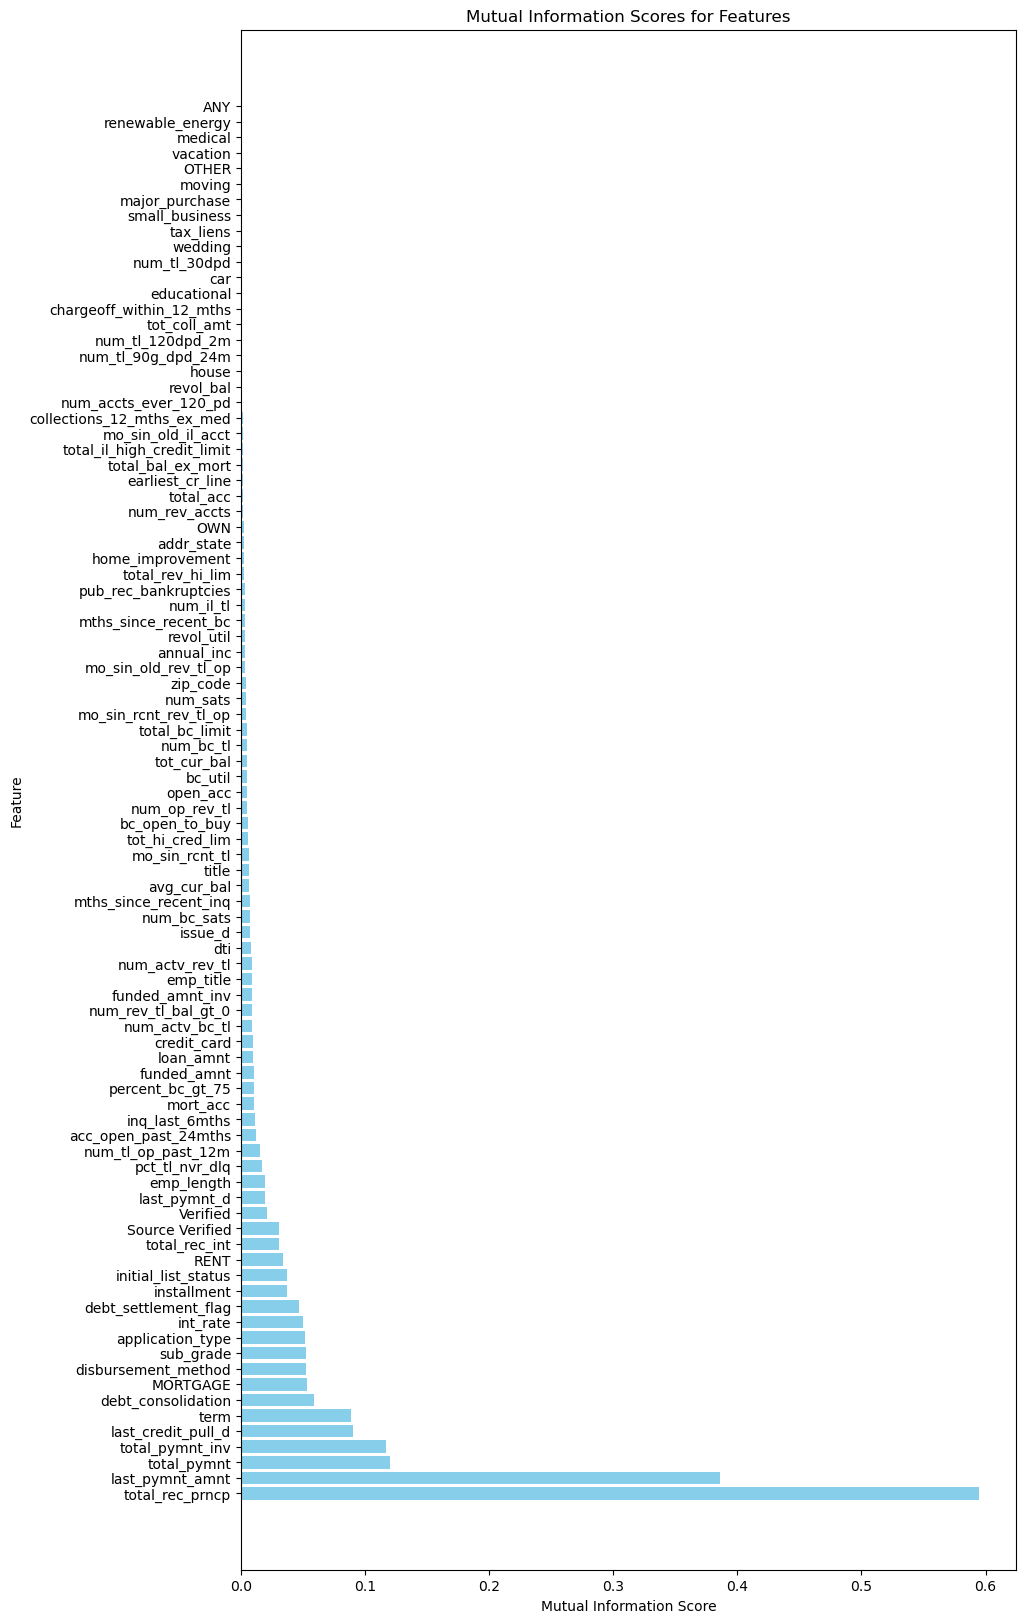

In [102]:
import matplotlib.pyplot as plt

# Plotting the mutual information scores
plt.figure(figsize=(10, 20))
plt.barh(mutual_info_scores['feature'], mutual_info_scores['score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores for Features')
plt.show()

In [103]:
selected_features = mutual_info_scores.head(18)['feature'].to_numpy()

In [104]:
selected_features

array(['total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt',
       'total_pymnt_inv', 'last_credit_pull_d', 'term',
       'debt_consolidation', 'MORTGAGE', 'disbursement_method',
       'sub_grade', 'application_type', 'int_rate',
       'debt_settlement_flag', 'installment', 'initial_list_status',
       'RENT', 'total_rec_int', 'Source Verified'], dtype=object)

In [105]:
train_df_22_X_selected = train_df_22_X[selected_features]
valid_df_22_X_selected = valid_df_22_X[selected_features]
X_test_22_selected = X_test_22[selected_features]

In [106]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(train_df_22_X_selected, train_df_22_y)

xgb_classifier.score(valid_df_22_X_selected, valid_df_22_y)

0.9975318083848989

In [107]:
!pip install shap

In [108]:
train_df_22_X_selected_v1 = train_df_22_X_selected.copy(deep=True)
valid_df_22_X_selected_v1 = valid_df_22_X_selected.copy(deep=True)
X_test_22_selected_v1 = X_test_22_selected.copy(deep=True)

train_df_22_X_selected_v1['payment_ratio'] = train_df_22_X_selected['total_pymnt_inv']/train_df_22_X_selected['total_pymnt'] 
valid_df_22_X_selected_v1['payment_ratio'] = valid_df_22_X_selected_v1['total_pymnt_inv']/valid_df_22_X_selected_v1['total_pymnt']
X_test_22_selected_v1['payment_ratio'] = X_test_22_selected_v1['total_pymnt_inv']/X_test_22_selected_v1['total_pymnt']

train_df_22_X_selected_v1.drop(['total_pymnt_inv', 'total_pymnt'], axis=1, inplace=True)
valid_df_22_X_selected_v1.drop(['total_pymnt_inv', 'total_pymnt'], axis=1, inplace=True)
X_test_22_selected_v1.drop(['total_pymnt_inv', 'total_pymnt'], axis=1, inplace=True)

train_df_22_X_selected_v1.head()

,total_rec_prncp,last_pymnt_amnt,last_credit_pull_d,term,debt_consolidation,MORTGAGE,disbursement_method,sub_grade,application_type,int_rate,debt_settlement_flag,installment,initial_list_status,RENT,total_rec_int,Source Verified,payment_ratio
0,14000.0,8611.87,4232,1.0,1.0,1.0,1,4,1,7.35,0,434.53,1,0.0,1118.39,0.0,1.000000
1,2000.0,70.18,3714,1.0,1.0,1.0,1,17,1,16.29,0,70.61,0,0.0,541.53,0.0,0.999998
2,5000.0,2662.94,3806,1.0,0.0,1.0,1,4,1,7.39,0,155.28,1,0.0,455.93,0.0,0.950000
3,20600.0,683.96,3867,1.0,1.0,1.0,1,10,1,11.99,0,684.12,1,0.0,4000.72,1.0,1.000000
4,10000.0,4753.53,4079,1.0,0.0,1.0,1,4,1,7.39,0,310.56,0,0.0,952.61,1.0,1.000000


In [109]:
xgb_classifier_v1 = XGBClassifier()
xgb_classifier_v1.fit(train_df_22_X_selected_v1, train_df_22_y)

xgb_classifier_v1.score(valid_df_22_X_selected_v1, valid_df_22_y)

0.9982096919974971

**Feature selection using correlation**

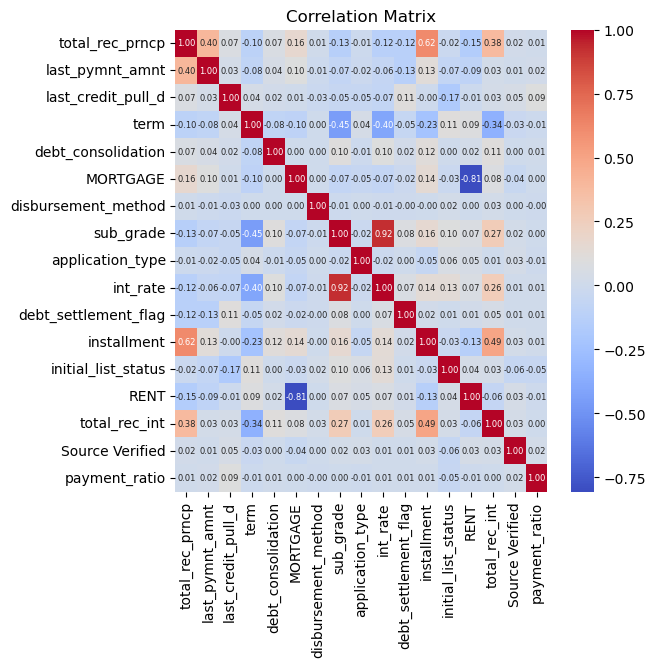

In [110]:
correlation_matrix = train_df_22_X_selected_v1.corr()

plt.figure(figsize=(6, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

In [111]:
train_df_22_X_final = train_df_22_X_selected_v1.drop(['int_rate'], axis=1)
valid_df_22_X_final = valid_df_22_X_selected_v1.drop(['int_rate'], axis=1)
X_test_22_final = X_test_22_selected_v1.drop(['int_rate'], axis=1)

In [113]:
xgb_classifier_final = XGBClassifier()
xgb_classifier_final.fit(train_df_22_X_final, train_df_22_y)

xgb_classifier_final.score(valid_df_22_X_final, valid_df_22_y)

0.998024287932513

In [114]:
len(train_df_22_X_final.columns)

16

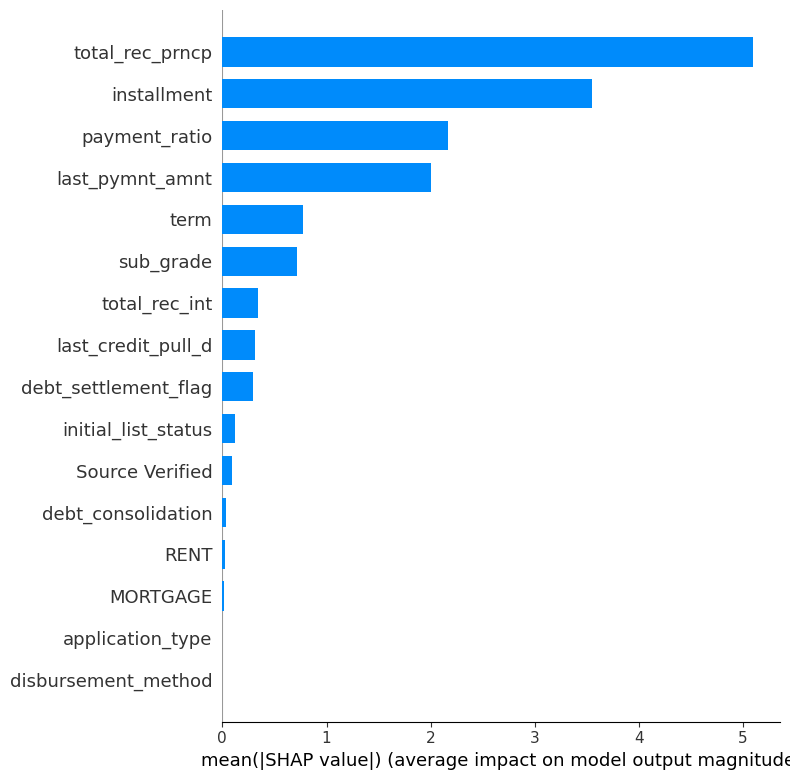

In [116]:
import shap
# Explain the model's predictions using SHAP
explainer= shap.TreeExplainer(xgb_classifier_final)
shap_values = explainer.shap_values(train_df_22_X_final)
# Plot the SHAP summary plot
shap.summary_plot(shap_values,train_df_22_X_final,plot_type="bar",show=False)

In [117]:
xgb_classifier_final = XGBClassifier()
xgb_classifier_final.fit(train_df_22_X_final, train_df_22_y)

xgb_classifier_final.score(valid_df_22_X_final, valid_df_22_y)

0.998024287932513

In [120]:
predicted_y = xgb_classifier_final.predict(X_test_22_final)
upload_df = pd.DataFrame({
    'loan_status': predicted_y,
})

In [124]:
upload_df = pd.concat([upload_df, X_test_22_final], axis=1)
upload_df

,loan_status,total_rec_prncp,last_pymnt_amnt,last_credit_pull_d,term,debt_consolidation,MORTGAGE,disbursement_method,sub_grade,application_type,...,disbursement_method,sub_grade,application_type,debt_settlement_flag,installment,initial_list_status,RENT,total_rec_int,Source Verified,payment_ratio
0,1,8100.00,8151.62,4018,1.0,1.0,0.0,1,10,1,...,1,10,1,0,267.00,0,1.0,46.46,1.0,1.000000
1,0,693.40,336.90,3564,1.0,0.0,0.0,1,12,1,...,1,12,1,0,336.90,0,0.0,310.08,1.0,1.000000
2,1,9450.00,7757.04,4018,1.0,1.0,1.0,1,10,1,...,1,10,1,0,321.47,0,0.0,878.80,0.0,1.000000
3,1,25000.00,946.48,2588,1.0,1.0,1.0,1,20,1,...,1,20,1,0,897.43,1,0.0,7307.33,0.0,0.999000
4,0,6268.46,380.56,3898,0.0,1.0,1.0,1,15,1,...,1,15,1,0,380.56,0,0.0,4754.46,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172591,1,7000.00,4242.53,4294,1.0,1.0,0.0,1,21,1,...,1,21,1,0,253.95,1,1.0,1583.40,1.0,1.000000
172592,1,12500.00,7607.08,4263,1.0,0.0,1.0,1,10,1,...,1,10,1,0,418.12,1,0.0,1797.00,0.0,1.000000
172593,1,30000.00,946.46,4202,1.0,0.0,0.0,1,5,1,...,1,5,1,0,938.57,0,0.0,3798.14,1.0,1.000000
172594,1,3500.00,2179.22,4294,1.0,1.0,1.0,1,5,1,...,1,5,1,0,110.64,0,0.0,346.88,0.0,1.000001


In [125]:
upload_df.to_csv('output.csv', index=False)